Comment utiliser le pipeline de sk learn

In [333]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_transformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder, Binarizer, PolynomialFeatures,MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV

import seaborn as sns

import pandas as pd 
import numpy as np 

dataframe = pd.read_csv("dataset.csv", sep=",", index_col=False)
dataframe.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [334]:
bins = [0, 18.5, 25, 30, 35, 40, float('inf')]
#labels = ['Poids insuffisant', 'Poids normal', 'Surpoids', 'Obésité grade I', 'Obésité grade II', 'Obésité grade III']
labels = ['insuffisant', 'normal', 'surpoids', 'obesite_g1', 'obesite_g2', 'obesite_g3']

# Remplacer le bmi_encoder par la catégorisation d'IMC
dataframe['bmi_category'] = pd.cut(dataframe['bmi'], bins=bins, labels=labels, right=False)

# # Encodage numérique des catégories d'IMC
# category_mapping = {
#     'Poids insuffisant': 0,
#     'Poids normal': 1,
#     'Surpoids': 2,
#     'Obésité grade I': 3,
#     'Obésité grade II': 4,
#     'Obésité grade III': 5
# }
# dataframe['bmi_encoded'] = dataframe['bmi_category'].map(category_mapping)

In [335]:
#dataframe = dataframe[ dataframe['charges'] <= 60000]

bmi_encoder= Binarizer(threshold=30)
#no children encoder
smoker_encoder = OrdinalEncoder(categories=[['no', 'yes']])
region_encoder = OneHotEncoder()

#encodage useless 
numeric = ["age","bmi","children"]
categoriel = ['region','sex','smoker']
transformer = make_column_transformer(
    (MinMaxScaler(), numeric),
    (OneHotEncoder(), categoriel)
)
#transformer.fit_transform(X)
#dataframe[["sex"]]
#sex_encoder.fit_transform(dataframe[["sex"]])

transformer

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['region', 'sex', 'smoker'])])

In [336]:
y = dataframe['charges']
X = dataframe.drop('charges', axis=1)

# pour pouvoir comparer le score
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])


In [337]:
# from bmi_transformer import BmiTransformer

# bmi_thresholds = [0, 18.5, 25, 30, 35, 40]
# bmi_transformer = BmiTransformer(bins = bmi_thresholds)

bmi_pipeline  = OneHotEncoder()
#bmi_pipeline  = make_pipeline(bmi_transformer, OneHotEncoder())
    #categories = ['insuffisant', 'normal', 'surpoids', 'obesite_g1', 'obesite_g2', 'obesite_g3']))

#bmi_pipeline  = make_union(Binarizer(threshold=30), StandardScaler())
#bmi_pipeline = make_union( make_pipeline(bmi_transformer, OneHotEncoder()), StandardScaler())


In [338]:
X_verif = pd.DataFrame(X_train["age"])
encoder_pipo = StandardScaler() 
pipo = encoder_pipo.fit_transform(X_verif, y_test)

columns = encoder_pipo.get_feature_names_out()
print(columns)

X_verif = pd.DataFrame(X_train["sex"])
encoder_pipo = OrdinalEncoder(categories=[['female', 'male']])
pipo = encoder_pipo.fit_transform(X_verif, y_test)

columns = encoder_pipo.get_feature_names_out()
print(columns)

X_verif = pd.DataFrame(X_train["bmi_category"])
pipo = bmi_pipeline.fit_transform(X_verif, y_test)

columns = bmi_pipeline.get_feature_names_out()
print(columns)

X_verif = pd.DataFrame(X_train["region"])
encoder_pipo = OneHotEncoder()
pipo = encoder_pipo.fit_transform(X_verif, y_test)

columns = encoder_pipo.get_feature_names_out()
print(columns)

# import scipy.sparse as sp
# from typing import cast

# matrix = cast(sp.csr_matrix, pipo)
# matrix.shape

['age']
['sex']
['bmi_category_insuffisant' 'bmi_category_normal'
 'bmi_category_obesite_g1' 'bmi_category_obesite_g2'
 'bmi_category_obesite_g3' 'bmi_category_surpoids']
['region_northeast' 'region_northwest' 'region_southeast'
 'region_southwest']


In [339]:
X_verif = pd.DataFrame(X_train["bmi_category"])
truc = bmi_pipeline.fit_transform(X_verif, y_test)

import scipy.sparse as sp
from typing import cast

matrix = cast(sp.csr_matrix, truc)
matrix.shape

(1137, 6)

In [359]:
pipe1 = make_pipeline( 
    make_column_transformer(
        (StandardScaler(), ['age']),
        (OrdinalEncoder(categories=[['female', 'male']]), ['sex']),
        (bmi_pipeline, ['bmi_category']),
        (OrdinalEncoder(categories=[['no', 'yes']]), ['smoker']),
        (StandardScaler(), ['children']), 
        (OneHotEncoder(), ['region']), 
        remainder='passthrough'))

pipe1.fit_transform(X_train, y_train)
columns = pipe1.get_feature_names_out()

columns


array(['standardscaler-1__age', 'ordinalencoder-1__sex',
       'onehotencoder-1__bmi_category_insuffisant',
       'onehotencoder-1__bmi_category_normal',
       'onehotencoder-1__bmi_category_obesite_g1',
       'onehotencoder-1__bmi_category_obesite_g2',
       'onehotencoder-1__bmi_category_obesite_g3',
       'onehotencoder-1__bmi_category_surpoids',
       'ordinalencoder-2__smoker', 'standardscaler-2__children',
       'onehotencoder-2__region_northeast',
       'onehotencoder-2__region_northwest',
       'onehotencoder-2__region_southeast',
       'onehotencoder-2__region_southwest', 'remainder__bmi'],
      dtype=object)

In [341]:
# preprocessor = make_pipeline( 
#     make_pipeline(
#         make_column_transformer(
#             (StandardScaler(), ['age']),
#             (bmi_pipeline, ['bmi_category']),
#             (OrdinalEncoder(categories=[['no', 'yes']]), ['smoker']),
#             remainder='passthrough'), 
#         PolynomialFeatures(degree=2)),

#     make_column_transformer(
#         (OrdinalEncoder(categories=[['female', 'male']]), ['sex']),
#         (StandardScaler(), ['children']), 
#         (OneHotEncoder(), ['region']), 
#         remainder='passthrough'))

preprocessor = make_pipeline( 
    make_column_transformer(
        (StandardScaler(), ['age']),
        (OrdinalEncoder(categories=[['female', 'male']]), ['sex']),
        (StandardScaler(), ['bmi']),
        (bmi_pipeline, ['bmi_category']),
        (OrdinalEncoder(categories=[['no', 'yes']]), ['smoker']),
        (StandardScaler(), ['children']), 
        (OneHotEncoder(), ['region']), 
        remainder='passthrough'), 
    PolynomialFeatures(degree=2))
    
preprocessor

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler-1',
                                                  StandardScaler(), ['age']),
                                                 ('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['female',
                                                                              'male']]),
                                                  ['sex']),
                                                 ('standardscaler-2',
                                                  StandardScaler(), ['bmi']),
                                                 ('onehotencoder-1',
                                                  OneHotEncoder(),
                                                  ['bmi_category']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'yes']]),
                                                  ['smoker']),
                                                 ('standardscaler-3',
                                                  StandardScaler(),
                                                  ['children']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(),
                                                  ['region'])])),
                ('polynomialfeatures', PolynomialFeatures())])

In [342]:

preprocessor.fit_transform(X_train, y_train)
columns = preprocessor.get_feature_names_out()

columns

array(['1', 'standardscaler-1__age', 'ordinalencoder-1__sex',
       'standardscaler-2__bmi',
       'onehotencoder-1__bmi_category_insuffisant',
       'onehotencoder-1__bmi_category_normal',
       'onehotencoder-1__bmi_category_obesite_g1',
       'onehotencoder-1__bmi_category_obesite_g2',
       'onehotencoder-1__bmi_category_obesite_g3',
       'onehotencoder-1__bmi_category_surpoids',
       'ordinalencoder-2__smoker', 'standardscaler-3__children',
       'onehotencoder-2__region_northeast',
       'onehotencoder-2__region_northwest',
       'onehotencoder-2__region_southeast',
       'onehotencoder-2__region_southwest', 'standardscaler-1__age^2',
       'standardscaler-1__age ordinalencoder-1__sex',
       'standardscaler-1__age standardscaler-2__bmi',
       'standardscaler-1__age onehotencoder-1__bmi_category_insuffisant',
       'standardscaler-1__age onehotencoder-1__bmi_category_normal',
       'standardscaler-1__age onehotencoder-1__bmi_category_obesite_g1',
       'stand

In [343]:
pipelineCV = make_pipeline(preprocessor, LassoCV(cv=5 ))

In [344]:

pipelineCV.fit(X_train, y_train)
score = pipelineCV.score(X_test, y_test)
print(f"  score  = {score} ")


  score  = 0.8752516926179147 


In [345]:
#valeurs max des charges

dataframe['charges'].sort_values(ascending=False).head(10)

543     63770.42801
1300    62592.87309
1230    60021.39897
577     58571.07448
819     55135.40209
1146    52590.82939
34      51194.55914
1241    49577.66240
1062    48970.24760
488     48885.13561
Name: charges, dtype: float64

Avec le meilleur alpha :

In [357]:
from sklearn.model_selection import GridSearchCV

#suppression des valeurs aberrantes, maj du df 
dataframe_simp = dataframe [dataframe['charges']<=60000]

X = dataframe_simp.drop(columns=['charges'])  
y = dataframe_simp['charges']   

# pour pouvoir comparer le score
#X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=42)

pipelineSearch = make_pipeline(
   preprocessor, 
   #PolynomialFeatures(degree=2, include_bias=False),  
   Lasso()  # Modèle Lasso
)

param_grid = {'lasso__alpha':np.arange(20, 60, 1)}
#param_grid = {'linearregression__alpha':np.arange(20, 40, 1)}

grid_search = GridSearchCV(pipelineSearch, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres :", grid_search.best_params_)
best_model = grid_search.best_estimator_
score = best_model.score(X_test, y_test)
print(f"  score  = {score} ")







Meilleurs paramètres : {'lasso__alpha': np.int64(48)}
  score  = 0.896067608195271 


In [347]:
# import sklearn as skl
# skl.set_config(enable_metadata_routing=True)

In [348]:
y_predicted = best_model.predict(X_test)

import sklearn.metrics as skl_metrics

rmse = skl_metrics.root_mean_squared_error(y_test, y_predicted)
Rsquare = skl_metrics.r2_score(y_test, y_predicted)

print(f"r2_score = {Rsquare} ")
print(f"sklearn.metrics.mean_squared_error = {rmse}")


r2_score = 0.896067608195271 
sklearn.metrics.mean_squared_error = 4062.1349033193


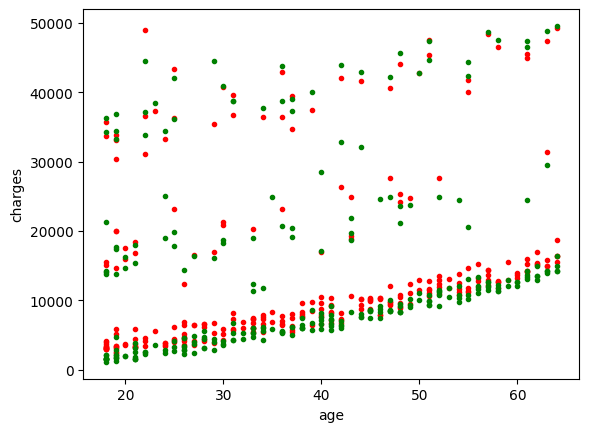

In [349]:
import matplotlib.pyplot as plt

#Charges = f ( age )
plt.xlabel("age")
plt.ylabel("charges")
plt.plot(X_test["age"], y_predicted, "r.")
plt.plot(X_test["age"], y_test, "g.")
plt.show()

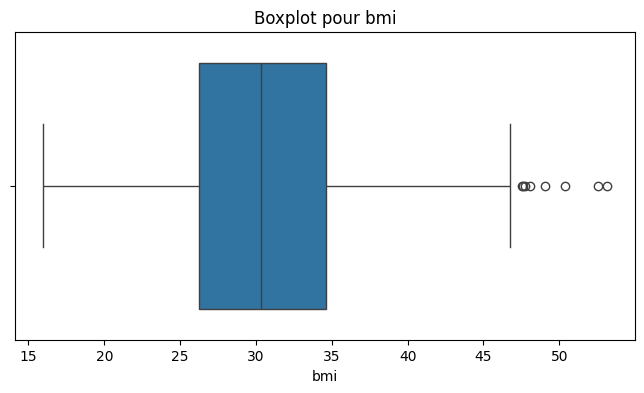

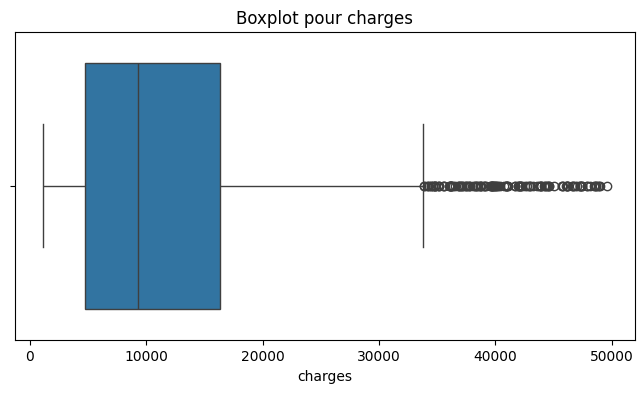

In [350]:
columns_to_check = ['bmi', 'charges']

for col in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataframe[col])
    plt.title(f"Boxplot pour {col}")
    plt.show()

In [358]:
# Fonction pour repérer les valeurs aberrantes basées sur l'IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Repérer les valeurs aberrantes dans `bmi` et `charges`
outliers_bmi = detect_outliers_iqr(dataframe, 'bmi')
outliers_charges = detect_outliers_iqr(dataframe, 'charges')

print("Valeurs aberrantes dans bmi :")
print(outliers_bmi)

print("\nValeurs aberrantes dans charges :")
print(outliers_charges)


Valeurs aberrantes dans bmi :
      age     sex    bmi  children smoker     region     charges bmi_category
116    58    male  49.06         0     no  southeast  11381.3254   obesite_g3
286    46  female  48.07         2     no  northeast   9432.9253   obesite_g3
401    47    male  47.52         1     no  southeast   8083.9198   obesite_g3
847    23    male  50.38         1     no  southeast   2438.0552   obesite_g3
860    37  female  47.60         2    yes  southwest  46113.5110   obesite_g3
1047   22    male  52.58         1    yes  southeast  44501.3982   obesite_g3
1088   52    male  47.74         1     no  southeast   9748.9106   obesite_g3
1317   18    male  53.13         0     no  southeast   1163.4627   obesite_g3

Valeurs aberrantes dans charges :
      age     sex     bmi  children smoker     region      charges  \
14     27    male  42.130         0    yes  southeast  39611.75770   
19     30    male  35.300         0    yes  southwest  36837.46700   
23     34  female  31.9

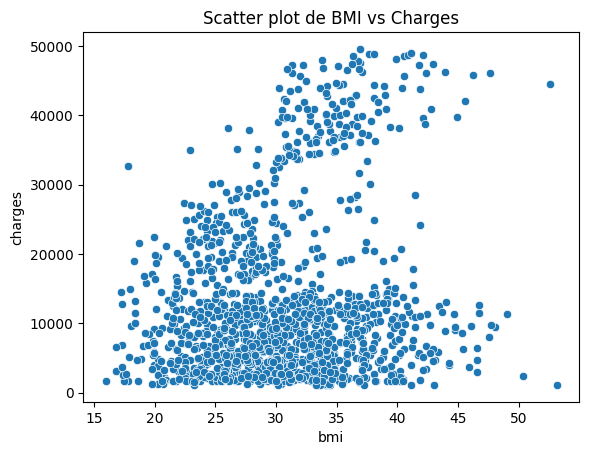

In [352]:
sns.scatterplot(data=dataframe, x='bmi', y='charges')
plt.title("Scatter plot de BMI vs Charges")
plt.show()


In [353]:
dataframe_cleaned = dataframe [dataframe['charges']<=60000]